In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [73]:
data = pd.read_csv('diabaties.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [46]:
data.shape

(768, 9)

In [26]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [47]:
print(data.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [27]:
from sklearn.model_selection import train_test_split
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class = ['Outcome']

In [28]:
X = data[feature_columns].values
y = data[predicted_class].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=10)

In [29]:
from sklearn.impute import SimpleImputer

In [52]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=10 ,  n_estimators = 5 )
model.fit(X_train, y_train.ravel())

RandomForestClassifier(n_estimators=5, random_state=10)

In [53]:
model.score(X_train,y_train)

0.959479015918958

In [54]:
model.score(X_test,y_test)

0.7532467532467533

In [55]:
# from sklearn.model_selection import train_test_split

In [56]:
model.predict(X_test[:10])

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [57]:
y_test[:10]

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]], dtype=int64)

In [58]:
from sklearn.tree import DecisionTreeClassifier
sk_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
sk_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [59]:
sk_tree.score(X_test,y_test)

0.7012987012987013

c:\users\yash\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Outcome', ylabel='count'>

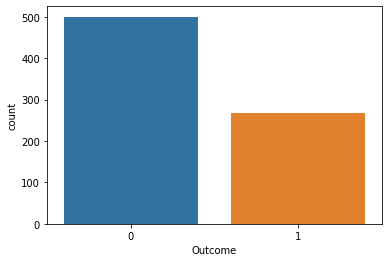

In [60]:
sns.countplot(data['Outcome'],label="Count")

In [72]:
print(format(sk_tree.feature_importances_))

[0.03977168 0.47535472 0.         0.01242032 0.05123525 0.22575278
 0.01891592 0.17654933]


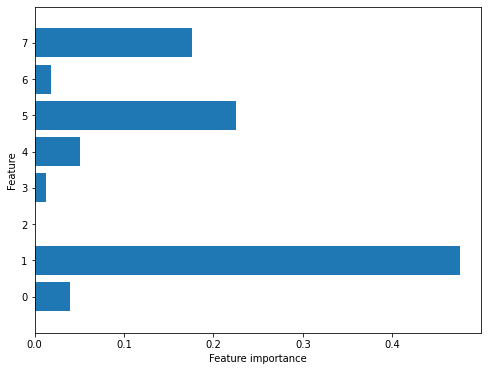

In [71]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(sk_tree)